<a href="https://colab.research.google.com/github/punitarani/MAT-494/blob/master/3.4%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 Logistic Regression

**Key Concepts**:

- Logit Function
- Sigmoid Function
- Cross-Entropy Loss
- Gradient Descent
- Demo with Scikit-Learn (sklearn.linear_model.LogisticRegression)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Logit Function

The logit function is used to transform the probability of an event into a linear combination of the features.
The logit function is defined as:

$\text{logit}(p) = \log \left( \frac{p}{1-p} \right) = \alpha^T x$

where:
- $p$ is the probability
- $\alpha$ is the vector of parameters
- $x$ is the vector of features

The regression model is defined as:

$\hat{p} = \sigma(\alpha^T x)$

where:
- $\hat{p}$ is the predicted probability
- $\sigma$ is the sigmoid function

In [2]:
def logit(p):
    """Logit Function"""
    return np.log(p / (1 - p))

## Sigmoid Function

The sigmoid function maps the real line to the interval $[0, 1]$.
It is defined as:

$\sigma(x) = \frac{1}{1 + e^{-x}}$


In [3]:
def sigmoid(x):
    """Sigmoid Function"""
    return 1 / (1 + np.exp(-x))

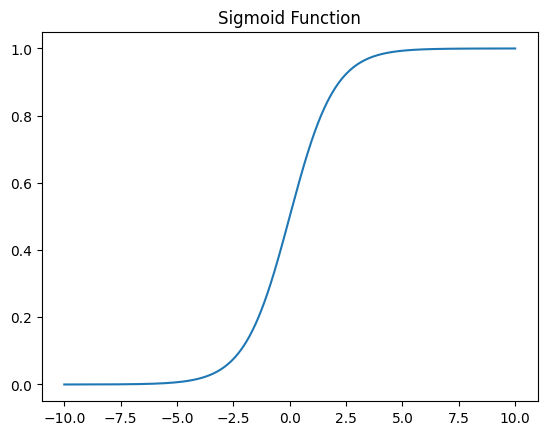

In [4]:
X = np.arange(-10, 10, 0.001)
Y = sigmoid(X)

plt.figure()
plt.plot(X, Y)
plt.title('Sigmoid Function')
plt.show()

## Cross-Entropy Loss

Cross-entropy loss is a measure of the difference between two probability distributions.
It is used to measure the performance of a classification model.

The cross-entropy loss is defined as:

$L(\alpha) = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log \hat{p}_i + (1 - y_i) \log (1 - \hat{p}_i) \right]$

where:
- $y_i$ is the true label of the $i$-th sample
- $\hat{p}_i$ is the predicted probability for the $i$-th sample
- $n$ is the number of samples

Gradient of Cross-Entropy Loss

$\nabla L(\alpha) = -\frac{1}{n} \sum_{i=1}^n (y_i - \hat{p}_i) x_i$


In [5]:
def cross_entropy_loss(y, p):
    """Cross-Entropy Loss"""
    return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

In [6]:
y = np.array([0, 1, 1, 0])
p = np.array([0.1, 0.9, 0.8, 0.4])

cel_y_p = cross_entropy_loss(y, p)
print(cel_y_p)

0.23617255159896325


## Gradient Descent

The gradient descent algorithm is used to minimize the loss function.
The gradient descent algorithm is defined as:

$\alpha^{(t+1)} = \alpha^{(t)} - \eta \nabla L(\alpha^{(t)})$

where:
- $\alpha^{(t)}$ is the vector of parameters at iteration $t$
- $\eta$ is the learning rate
- $\nabla L(\alpha)$ is the gradient of the loss function with respect to the parameters

## Demo

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [8]:
data = pd.read_csv("./data/insurance_data.csv")
X = data.age.to_numpy().reshape((-1,1))
y = data.insurance.to_numpy()

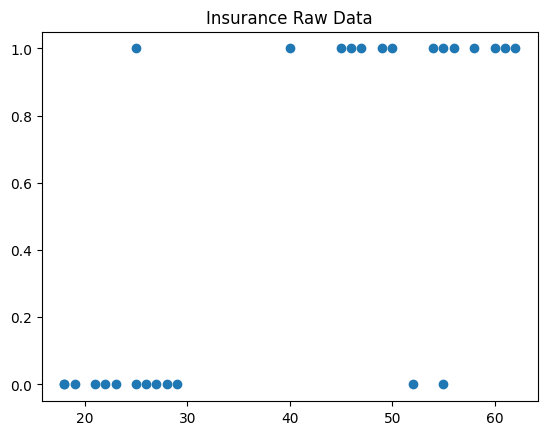

In [9]:
plt.figure()
plt.scatter(X, y)
plt.title("Insurance Raw Data")
plt.show()

In [10]:
model = LogisticRegression()
model.fit(X, y)

print(model.coef_, model.intercept_)

[[0.1354656]] [-5.26279696]


In [11]:
X_Y = np.arange(15, 70)
Y = sigmoid(model.coef_[0]*X_Y+model.intercept_)
model_Y = [model.predict(np.array([x]).reshape((-1,1))) for x in X_Y]

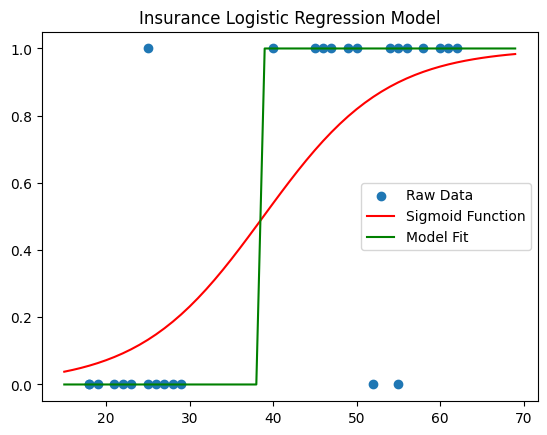

In [12]:
plt.figure()
plt.scatter(X, y, label="Raw Data")
plt.plot(X_Y, Y, color="r", label="Sigmoid Function")
plt.plot(X_Y, model_Y, color="g", label="Model Fit")
plt.title("Insurance Logistic Regression Model")
plt.legend()
plt.show()